# Data Ingestion & Staging


In [1]:
# Read into spark
df_spark = spark.sql("SELECT * FROM hvFHV.dbo.`fhvhv_tripdata_2025-01`")
display(df_spark)

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 3, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 5e466642-0252-467c-9ea0-fc6f9b9247d9)

In [2]:
# row count
row_count = df_spark.count()

# column count
col_count = len(df_spark.columns)

# Print shape
print(f"Shape of the DataFrame: ({row_count}, {col_count})")

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 4, Finished, Available, Finished)

Shape of the DataFrame: (20405666, 25)


In [3]:
# Columns 
df_spark.columns

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 5, Finished, Available, Finished)

['hvfhs_license_num',
 'dispatching_base_num',
 'originating_base_num',
 'request_datetime',
 'on_scene_datetime',
 'pickup_datetime',
 'dropoff_datetime',
 'PULocationID',
 'DOLocationID',
 'trip_miles',
 'trip_time',
 'base_passenger_fare',
 'tolls',
 'bcf',
 'sales_tax',
 'congestion_surcharge',
 'airport_fee',
 'tips',
 'driver_pay',
 'shared_request_flag',
 'shared_match_flag',
 'access_a_ride_flag',
 'wav_request_flag',
 'wav_match_flag',
 'cbd_congestion_fee']

In [4]:
# Building sample data for A/B testing 
df_sample = df_spark.sample(withReplacement=False, fraction=0.025, seed=52)

print("Sample data row count:", df_sample.count())
print("Sample data column count:", len(df_sample.columns))

# Show 
display(df_sample)

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 6, Finished, Available, Finished)

Sample data row count: 508301
Sample data column count: 25


SynapseWidget(Synapse.DataFrame, ce9937dd-3080-459a-9fce-57d3bee1eaa6)

### Spark to Pandas

In [5]:
# Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set float display to avoid scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

# Wranings 
import warnings
warnings.filterwarnings('ignore')

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 7, Finished, Available, Finished)

In [6]:
# Spark to pandas df
from pyspark.sql import SparkSession
df = df_sample.toPandas()

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 8, Finished, Available, Finished)

In [7]:
# Heads
display(df)

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 9, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, de1f7e5e-18fb-4956-9515-787ca6dce71f)

In [8]:
# Info 
df.info()

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 10, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508301 entries, 0 to 508300
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   hvfhs_license_num     508301 non-null  object        
 1   dispatching_base_num  508301 non-null  object        
 2   originating_base_num  383498 non-null  object        
 3   request_datetime      508301 non-null  datetime64[ns]
 4   on_scene_datetime     383498 non-null  datetime64[ns]
 5   pickup_datetime       508301 non-null  datetime64[ns]
 6   dropoff_datetime      508301 non-null  datetime64[ns]
 7   PULocationID          508301 non-null  int32         
 8   DOLocationID          508301 non-null  int32         
 9   trip_miles            508301 non-null  float64       
 10  trip_time             508301 non-null  int64         
 11  base_passenger_fare   508301 non-null  float64       
 12  tolls                 508301 non-null  float64       
 13 

In [9]:
df.columns

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 11, Finished, Available, Finished)

Index(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime', 'pickup_datetime',
       'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_miles',
       'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
       'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
       'shared_request_flag', 'shared_match_flag', 'access_a_ride_flag',
       'wav_request_flag', 'wav_match_flag', 'cbd_congestion_fee'],
      dtype='object')

In [10]:
# Drop columns
df.drop(['hvfhs_license_num', 'dispatching_base_num', 'originating_base_num',
       'request_datetime', 'on_scene_datetime','dropoff_datetime', 
        'PULocationID', 'DOLocationID', 'shared_request_flag', 
        'shared_match_flag', 'access_a_ride_flag', 'wav_request_flag', 
        'wav_match_flag'], axis=1, inplace=True)

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 12, Finished, Available, Finished)

In [11]:
# treat trip time 
df['trip_time'] = df['trip_time'].astype('float64')             # from int32 to float 64
df['trip_time'] = df['trip_time'] / 60                          # seconds to minutes

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 13, Finished, Available, Finished)

In [12]:
# Describe
df.select_dtypes('float64').describe()

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 14, Finished, Available, Finished)

,trip_miles,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,cbd_congestion_fee
count,508301.00,508301.00,508301.00,508301.00,508301.00,508301.00,508301.00,508301.00,508301.00,508301.00,508301.00
mean,4.85,18.22,24.28,1.03,0.67,2.04,1.01,0.19,1.05,18.65,0.46
std,5.70,12.48,21.03,3.54,0.60,1.74,1.32,0.66,3.15,15.96,0.69
min,0.00,0.02,-10.82,0.00,0.00,0.00,0.00,0.00,0.00,-31.34,0.00
25%,1.48,9.37,11.64,0.00,0.31,0.97,0.00,0.00,0.00,8.35,0.00
50%,2.83,15.05,18.02,0.00,0.49,1.52,0.00,0.00,0.00,13.93,0.00
75%,6.04,23.57,28.95,0.00,0.79,2.49,2.75,0.00,0.00,23.47,1.50
max,218.20,423.53,1210.97,51.81,35.38,114.32,2.75,5.00,131.32,994.20,1.50


## Derived Columns

#### Airport Flag

In [13]:
# Airport flag
df['is_airport'] = (df['airport_fee'] > 0).astype(int)      # 1/0 flag
df['is_airport'].value_counts(normalize=True)               # Value counts

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 15, Finished, Available, Finished)

is_airport
0   0.92
1   0.08
Name: proportion, dtype: float64

In [14]:
df.info()

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 16, Finished, Available, Finished)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508301 entries, 0 to 508300
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   pickup_datetime       508301 non-null  datetime64[ns]
 1   trip_miles            508301 non-null  float64       
 2   trip_time             508301 non-null  float64       
 3   base_passenger_fare   508301 non-null  float64       
 4   tolls                 508301 non-null  float64       
 5   bcf                   508301 non-null  float64       
 6   sales_tax             508301 non-null  float64       
 7   congestion_surcharge  508301 non-null  float64       
 8   airport_fee           508301 non-null  float64       
 9   tips                  508301 non-null  float64       
 10  driver_pay            508301 non-null  float64       
 11  cbd_congestion_fee    508301 non-null  float64       
 12  is_airport            508301 non-null  int64         
dtyp

In [15]:
# Add pickup hour 
df['pickup_hour'] = df['pickup_datetime'].dt.hour

# Value counts
df['pickup_hour'].value_counts(normalize=True)

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 17, Finished, Available, Finished)

pickup_hour
18   0.06
17   0.06
19   0.06
8    0.05
20   0.05
16   0.05
21   0.05
15   0.05
14   0.05
22   0.05
9    0.05
13   0.05
7    0.04
12   0.04
23   0.04
10   0.04
11   0.04
0    0.03
6    0.03
1    0.02
5    0.02
2    0.02
4    0.01
3    0.01
Name: proportion, dtype: float64

#### Peak Hour Flag

In [16]:
# peak hour flag 
df['is_peak'] = (df['pickup_hour'].isin([8,9,13,14,15,16,
                    17,18,19,20,21,22])).astype(int)

# Value counts                
df['is_peak'].value_counts(normalize=True)

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 18, Finished, Available, Finished)

is_peak
1   0.64
0   0.36
Name: proportion, dtype: float64

#### Weekend Flag

In [17]:
# Day of week 
df['day_of_week'] = df['pickup_datetime'].dt.day_of_week
df['day_of_week'].value_counts()

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 19, Finished, Available, Finished)

day_of_week
4    88669
3    81906
2    81178
5    74136
6    63605
1    62037
0    56770
Name: count, dtype: int64

In [18]:
# Weekend flag 
df['is_weekend'] = df['day_of_week'].apply(lambda x: 1 if x >=5 else 0)
df.groupby('day_of_week')['is_weekend'].unique()

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 20, Finished, Available, Finished)

day_of_week
0    [0]
1    [0]
2    [0]
3    [0]
4    [0]
5    [1]
6    [1]
Name: is_weekend, dtype: object

## Segmenting fares

#### Trip Miles Segmentation

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 21, Finished, Available, Finished)

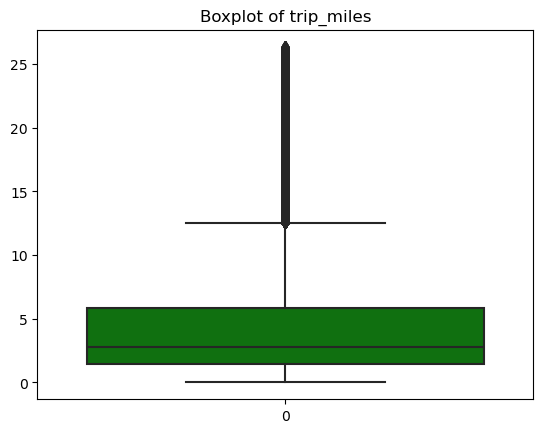

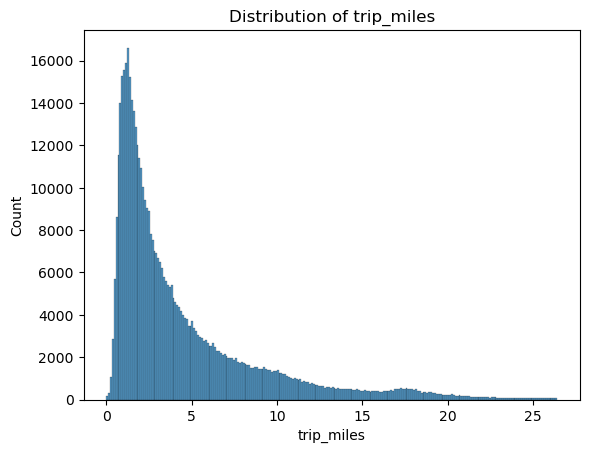

In [19]:
# Boxplots
sns.boxplot(df.trip_miles[df.trip_miles <= df['trip_miles'].quantile(0.99)], color='green')
plt.title ("Boxplot of trip_miles")
plt.show()

# Histograms
sns.histplot(df.trip_miles[df.trip_miles <= df['trip_miles'].quantile(0.99)])
plt.title ("Distribution of trip_miles")
plt.show()

In [20]:
# Describe, show percentiles for cut-offs
df.trip_miles.describe(percentiles=[0,0.5,0.6,0.75,0.8,0.9,0.99])

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 22, Finished, Available, Finished)

count   508301.00
mean         4.85
std          5.70
min          0.00
0%           0.00
50%          2.83
60%          3.74
75%          6.04
80%          7.29
90%         11.18
99%         26.39
max        218.20
Name: trip_miles, dtype: float64

📌 **Segmentation Strategy for Elasticity**

- Instead of just short vs. long (median split), use percentile-based bins to capture more structure while keeping things interpretable:
- Short trips → ≤ 3 miles (≈50th percentile)
- Medium trips → 3–7 miles (≈50–80th percentile)
- Long trips → 7–11 miles (≈80–90th percentile)
- Very long trips → > 11 miles (top 10%, often outliers like airport or intercity)

In [21]:
# Trip distance segmentation

def segment_distance(m):
    if m <= 3:
        return "short≤3"
    elif m <= 6:
        return "urban3-6"
    elif m <= 11:
        return "ext urban6-11"
    elif m <= 26:
        return "airport/suburban11-26"
    else:
        return "very_long>26"

# Apply segmentation
df["distance_segment"] = df["trip_miles"].apply(segment_distance)

# Distribution check
print(df["distance_segment"].value_counts())
print(df["distance_segment"].value_counts(normalize=True).round(3))

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 23, Finished, Available, Finished)

distance_segment
short≤3                  265074
urban3-6                 115278
ext urban6-11             75552
airport/suburban11-26     47077
very_long>26               5320
Name: count, dtype: int64
distance_segment
short≤3                 0.52
urban3-6                0.23
ext urban6-11           0.15
airport/suburban11-26   0.09
very_long>26            0.01
Name: proportion, dtype: float64


StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 24, Finished, Available, Finished)

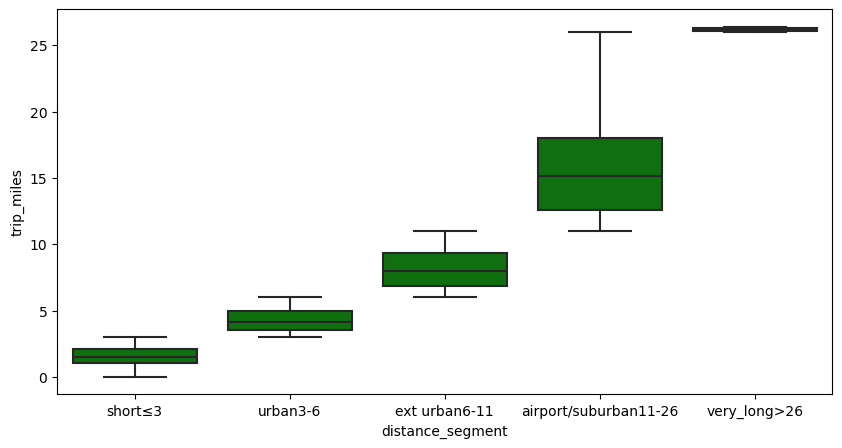

In [22]:
# Boxplots 
order = ['short≤3', 'urban3-6', 'ext urban6-11', 'airport/suburban11-26', 'very_long>26']
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['distance_segment'], y=df.trip_miles [df['trip_miles'] <= 
                df['trip_miles'].quantile(0.99)], color='green', order=order)
plt.show()

#### Trip Time segmentation

In [23]:
# Describe 
df['trip_time'].describe(percentiles=[0.80,0.90,0.95,0.99])

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 25, Finished, Available, Finished)

count   508301.00
mean        18.22
std         12.48
min          0.02
50%         15.05
80%         26.20
90%         34.35
95%         42.38
99%         61.17
max        423.53
Name: trip_time, dtype: float64

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 26, Finished, Available, Finished)

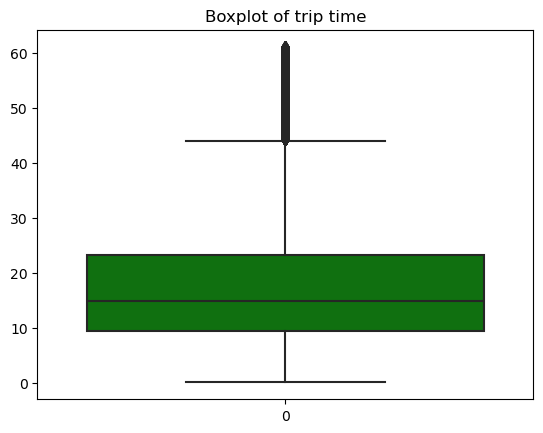

Text(0.5, 1.0, 'Distribution of trip time')

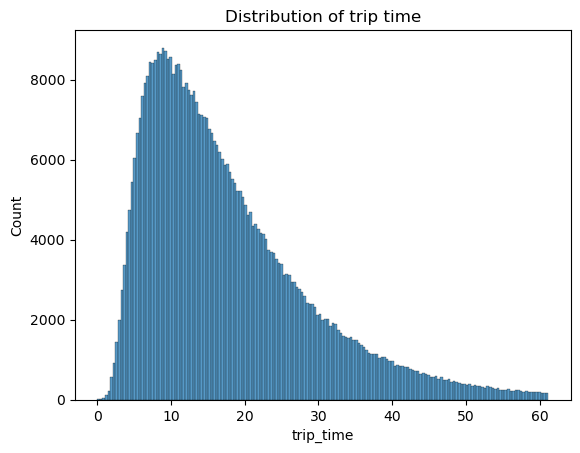

In [24]:
# Boxplots trip time
sns.boxplot(df.trip_time[df.trip_time <= df.trip_time.quantile(0.99)], color='green')
plt.title ("Boxplot of trip time")
plt.show()
# Histograms
sns.histplot(df.trip_time[df.trip_time <= df['trip_time'].quantile(0.99)])
plt.title ("Distribution of trip time")

In [25]:
df[['trip_time']].describe(percentiles=[0.75,0.80,0.85,0.90,0.95,0.99])

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 27, Finished, Available, Finished)

,trip_time
count,508301.00
mean,18.22
std,12.48
min,0.02
50%,15.05
75%,23.57
80%,26.20
85%,29.58
90%,34.35
95%,42.38


In [26]:
# Very long trip_time count# 
df.trip_time[df['trip_time'] > df['trip_time'].quantile(0.99)].count()

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 28, Finished, Available, Finished)

5080

In [27]:
# percentile cut-offs
p50 = df["trip_time"].quantile(0.50)   # median
p85 = df["trip_time"].quantile(0.85)   # upper medium
p99 = df["trip_time"].quantile(0.99)   # very long cutoff

def segment_time(t):
    if t <= p50:
        return "short ≤50%"
    elif t <= p85:
        return "medium 50-85%"
    elif t <= p99:
        return "long 85-99%"
    else:
        return "verylong >99%"

# Apply segmentation
df["time_segment"] = df["trip_time"].apply(segment_time)

# Distribution check
print(df["time_segment"].value_counts())
print(df["time_segment"].value_counts(normalize=True).round(3))

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 29, Finished, Available, Finished)

time_segment
short ≤50%       254437
medium 50-85%    177714
long 85-99%       71070
verylong >99%      5080
Name: count, dtype: int64
time_segment
short ≤50%      0.50
medium 50-85%   0.35
long 85-99%     0.14
verylong >99%   0.01
Name: proportion, dtype: float64


In [28]:
df['time_segment'].value_counts()

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 30, Finished, Available, Finished)

time_segment
short ≤50%       254437
medium 50-85%    177714
long 85-99%       71070
verylong >99%      5080
Name: count, dtype: int64

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 31, Finished, Available, Finished)

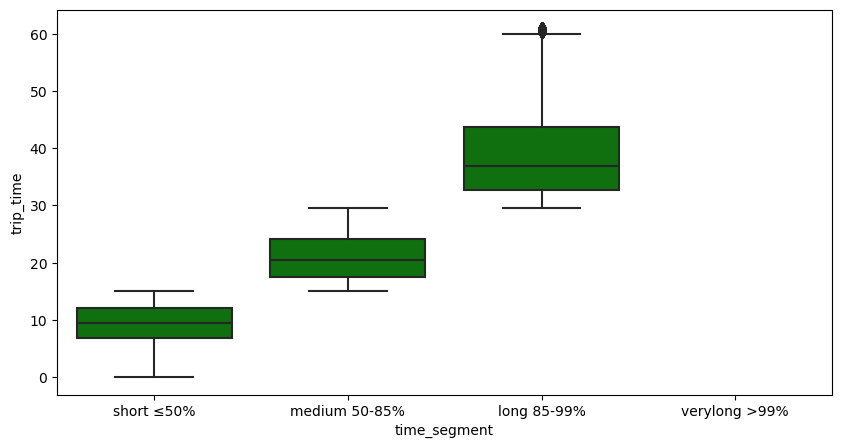

In [29]:
# Boxplots 
order = ['short ≤50%', 'medium 50-85%', 'long 85-99%', 'verylong >99%']
plt.figure (figsize=(10,5))
sns.boxplot (x=df['time_segment'], y=df.trip_time [df['trip_time'] 
                <= df['trip_time'].quantile(0.99)], color='green', order = order)
plt.show()                

## Exporting data

In [30]:
df.drop(['tolls', 'bcf', 'sales_tax', 'congestion_surcharge', 'airport_fee',
       'tips', 'driver_pay', 'cbd_congestion_fee', 'pickup_hour', 'day_of_week'], 
       axis=1, inplace=True)
df.columns

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 32, Finished, Available, Finished)

Index(['pickup_datetime', 'trip_miles', 'trip_time', 'base_passenger_fare',
       'is_airport', 'is_peak', 'is_weekend', 'distance_segment',
       'time_segment'],
      dtype='object')

In [35]:
df.head()

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 37, Finished, Available, Finished)

,pickup_datetime,trip_miles,trip_time,base_passenger_fare,is_airport,is_peak,is_weekend,distance_segment,time_segment
0,2025-01-04 14:57:17,4.50,33.60,31.33,0,1,1,urban3-6,long 85-99%
1,2025-01-04 14:21:39,2.39,12.97,13.38,0,1,1,short≤3,short ≤50%
2,2025-01-04 14:06:35,3.84,8.37,13.41,0,1,1,urban3-6,short ≤50%
3,2025-01-04 14:07:17,4.12,13.20,16.06,0,1,1,urban3-6,short ≤50%
4,2025-01-04 14:20:37,25.18,51.23,93.14,1,1,1,airport/suburban11-26,long 85-99%


In [50]:
# Save as parquet to lakehouse
df.to_parquet ("/lakehouse/default/Files/AB_data/market_level_elasticity/staged_df.parquet")

StatementMeta(, 71101e66-a117-4a51-914a-023420c72434, 52, Finished, Available, Finished)